# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?
- What exactly is your deliverable: your analysis, or the model itself?
- Does your business understanding/stakeholder require a specific type of model?
    - For example: a highly regulated industry would require a very transparent/simple/interpretable model, whereas a situation where the model itself is your deliverable would likely benefit from a more complex and thus stronger model
   

Additional questions to consider for classification:

- What does a false positive look like in this context?
- What does a false negative look like in this context?
- Which is worse for your stakeholder?
- What metric are you focusing on optimizing, given the answers to the above questions?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [1]:
# code here to explore your data
import pandas as pd

df_l = pd.read_csv('../../data/Training Set Labels.csv')
df_v = pd.read_csv('../../data/Training Set Values.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

In [3]:
df = pd.merge(df_v, df_l, on='id')
del df_l

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [6]:
df.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Chongolo                     1
Pentekoste                   1
Kando                        1
Banca Reale                  1
Dom                          1
Name: funder, Length: 1897, dtype: int64

In [7]:
def funder_top5(row):  
    '''Making top 5 values and setting the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'Gov'
    elif row['funder']=='Danida':
        return 'Danida'
    elif row['funder']=='Hesawa':
        return 'Hesawa'
    elif row['funder']=='Rwssp':
        return 'Rwssp'
    elif row['funder']=='World Bank':
        return 'World_bank'    
    else:
        return 'other'
    
df['funder'] = df.apply(lambda row: funder_top5(row), axis=1)

In [8]:
str_to_num = {'functional':1, 'functional needs repair':0,
                   'non functional':0}

df['status_group_new']  = df['status_group'].replace(str_to_num)

In [9]:
piv_table = pd.pivot_table(df,index=['funder','status_group'],
                           values='status_group_new', aggfunc='count')
piv_table

status_group_new
funder     status_group                             
Danida     functional                           1713
           functional needs repair               159
           non functional                       1242
Gov        functional                           3720
           functional needs repair               701
           non functional                       4663
Hesawa     functional                            936
           functional needs repair               232
           non functional                       1034
Rwssp      functional                            805
           functional needs repair               109
           non functional                        460
World_bank functional                            545
           functional needs repair                97
           non functional                        707
other      functional                          24540
           functional needs repair              3019
           non functional                      14718

In [10]:
# code here to prepare your data
total_danida = piv_table.loc[('Danida','functional')] + piv_table.loc[('Danida','functional needs repair')] + piv_table.loc[('Danida','non functional')]
percent_functional_danida = (piv_table.loc[('Danida','functional')] / total_danida) * 100

total_gov = piv_table.loc[('Gov','functional')] + piv_table.loc[('Gov','functional needs repair')] + piv_table.loc[('Danida','non functional')]
percent_functional_gov = (piv_table.loc[('Gov','functional')] / total_gov) * 100

total_hesawa = piv_table.loc[('Hesawa','functional')] + piv_table.loc[('Hesawa','functional needs repair')] + piv_table.loc[('Hesawa','non functional')]
percent_functional_hesawa = (piv_table.loc[('Hesawa','functional')] / total_hesawa) * 100

total_rwssp = piv_table.loc[('Rwssp','functional')] + piv_table.loc[('Rwssp','functional needs repair')] + piv_table.loc[('Rwssp','non functional')]
percent_functional_rwssp = (piv_table.loc[('Rwssp','functional')] / total_rwssp) * 100

total_world_bank = piv_table.loc[('World_bank','functional')] + piv_table.loc[('World_bank','functional needs repair')] + piv_table.loc[('World_bank','non functional')]
percent_functional_world_bank = (piv_table.loc[('World_bank', 'functional')] / total_world_bank) * 100

total_other = piv_table.loc[('other', 'functional')] + piv_table.loc[('other', 'functional needs repair')] + piv_table.loc[('other','non functional')]
percent_functional_other = (piv_table.loc[('other','functional')] / total_other) * 100

print('Percent functional danida: ', round(percent_functional_danida,3))
print('Percent functional gov: ', round(percent_functional_gov,3))
print('Percent functional hesawa: ', round(percent_functional_hesawa,3))
print('Percent functional other: ', round(percent_functional_other,3))
print('Percent functional rwssp: ', round(percent_functional_rwssp,3))
print('Percent functional world bank: ', round(percent_functional_world_bank,3))

Percent functional danida:  status_group_new    55.01
dtype: float64
Percent functional gov:  status_group_new    65.69
dtype: float64
Percent functional hesawa:  status_group_new    42.507
dtype: float64
Percent functional other:  status_group_new    58.046
dtype: float64
Percent functional rwssp:  status_group_new    58.588
dtype: float64
Percent functional world bank:  status_group_new    40.4
dtype: float64


In [11]:
df.installer.value_counts()


DWE                  17402
Government            1825
RWE                   1206
Commu                 1060
DANIDA                1050
                     ...  
Water Aid/DWE            1
World Visiin             1
Arrian                   1
MREMI CONTRACTOR         1
AQUA BLUES ANGELS        1
Name: installer, Length: 2145, dtype: int64

In [12]:
def installer_top5(row):
    '''Keep top 5 values and set the rest to 'other'''
    if row['installer']=='DWE':
        return 'DWE'
    elif row['installer']=='Government':
        return 'Gov'
    elif row['installer']=='RWE':
        return 'RWE'
    elif row['installer']=='Commu':
        return 'Commu'
    elif row['installer']=='DANIDA':
        return 'Danida'
    else:
        return 'other'  

df['installer'] = df.apply(lambda row: installer_top5(row), axis=1)

In [13]:
piv_table2 = pd.pivot_table(df,index=['installer','status_group'],
                           values='status_group_new', aggfunc='count')
piv_table2

status_group_new
installer status_group                             
Commu     functional                            724
          functional needs repair                32
          non functional                        304
DWE       functional                           9433
          functional needs repair              1622
          non functional                       6347
Danida    functional                            542
          functional needs repair                83
          non functional                        425
Gov       functional                            535
          functional needs repair               256
          non functional                       1034
RWE       functional                            304
          functional needs repair               137
          non functional                        765
other     functional                          20721
          functional needs repair              2187
          non functional                      13949

In [14]:
total_commu = piv_table2.loc[('Commu', 'functional')] + piv_table2.loc[('Commu', 'functional needs repair')] + piv_table2.loc[('Commu', 'non functional')]
percent_functional_commu = (piv_table2.loc[('Commu', 'functional')] / total_commu) * 100

total_dwe = piv_table2.loc[('DWE', 'functional')] + piv_table2.loc[('DWE', 'functional needs repair')] + piv_table2.loc[('DWE', 'non functional')]
percent_functional_dwe = (piv_table2.loc[('DWE', 'functional')] / total_dwe) * 100

total_rwe = piv_table2.loc[('RWE', 'functional')] + piv_table2.loc[('RWE', 'functional needs repair')] + piv_table2.loc[('RWE', 'non functional')]
percent_functional_rwe = (piv_table2.loc[('Commu', 'functional')] / total_rwe) * 100

total_other = piv_table2.loc[('other', 'functional')] + piv_table2.loc[('other', 'functional needs repair')] + piv_table2.loc[('other', 'non functional')]
percent_functional_other = (piv_table2.loc[('other', 'functional')] / total_other) * 100

print('Percent functional commu: ', round(percent_functional_commu,3))
print('Percent functional dwe: ', round(percent_functional_dwe,3))
print('Percent functional rwe: ', round(percent_functional_rwe,3))
print('Percent functional other: ', round(percent_functional_other,3))



Percent functional commu:  status_group_new    68.302
dtype: float64
Percent functional dwe:  status_group_new    54.206
dtype: float64
Percent functional rwe:  status_group_new    60.033
dtype: float64
Percent functional other:  status_group_new    56.22
dtype: float64


In [15]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [16]:
def scheme_top5(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['scheme_management']=='VWC':
        return 'VWC'
    elif row['scheme_management']=='WUG':
        return 'WUG'
    elif row['scheme_management']=='Water authority':
        return 'Water Authority'
    elif row['scheme_management']=='WUA':
        return 'WUA'
    elif row['scheme_management']=='Water Board':
        return 'Water Board'
    else:
        return 'other'

df['scheme_management'] = df.apply(lambda row: scheme_top5(row), axis=1)

In [17]:
piv_table3 = pd.pivot_table(df, index=['scheme_management', 'status_group'],
                           values='status_group_new', aggfunc='count')
piv_table3

status_group_new
scheme_management status_group                             
VWC               functional                          18960
                  functional needs repair              2334
                  non functional                      15499
WUA               functional                           1995
                  functional needs repair               239
                  non functional                        649
WUG               functional                           3006
                  functional needs repair               672
                  non functional                       1528
Water Authority   functional                           1618
                  functional needs repair               448
                  non functional                       1087
Water Board       functional                           2053
                  functional needs repair               111
                  non functional                        584
other             functional                           4627
                  functional needs repair               513
                  non functional                       3477

In [18]:
total_vwc = piv_table3.loc[('VWC', 'functional')] + piv_table3.loc[('VWC','functional needs repair')] + piv_table3.loc[('VWC','non functional')]
percent_functional_vwc = (piv_table3.loc[('VWC', 'functional')] / total_vwc) * 100

total_wua = piv_table3.loc[('WUA', 'functional')] + piv_table3.loc[('WUA','functional needs repair')] + piv_table3.loc[('WUA','non functional')]
percent_functional_wua = (piv_table3.loc[('WUA', 'functional')] / total_wua) * 100

total_wug = piv_table3.loc[('WUG', 'functional')] + piv_table3.loc[('WUG','functional needs repair')] + piv_table3.loc[('WUG','non functional')]
percent_functional_wug = (piv_table3.loc[('WUG', 'functional')] / total_wug) * 100

total_wtr_auth = piv_table3.loc[('Water Authority', 'functional')] + piv_table3.loc[('Water Authority','functional needs repair')] + piv_table3.loc[('Water Authority','non functional')]
percent_functional_wtr_auth = (piv_table3.loc[('Water Authority', 'functional')] / total_wtr_auth) * 100

total_wtr_brd = piv_table3.loc[('Water Board', 'functional')] + piv_table3.loc[('Water Board', 'functional needs repair')] + piv_table3.loc[('Water Board', 'non functional')]
percent_functional_wtr_brd = (piv_table3.loc[('Water Authority', 'functional')] / total_wtr_brd) * 100

total_other = piv_table3.loc[('other', 'functional')] + piv_table3.loc[('other', 'functional needs repair')] + piv_table3.loc[('other', 'non functional')]
percent_functional_other = (piv_table3.loc[('other', 'functional')] / total_other) * 100

print('Percent functional other: ', round(percent_functional_other,3))
print('Percent functional vwc: ', round(percent_functional_vwc,3))
print('Percent functional water authority: ', round(percent_functional_wtr_auth,3))
print('Percent functional water board: ', round(percent_functional_wtr_brd,3))
print('Percent functional wua: ', round(percent_functional_wua,3))
print('Percent functional wug: ', round(percent_functional_wug,3))

Percent functional other:  status_group_new    53.696
dtype: float64
Percent functional vwc:  status_group_new    51.532
dtype: float64
Percent functional water authority:  status_group_new    51.316
dtype: float64
Percent functional water board:  status_group_new    58.879
dtype: float64
Percent functional wua:  status_group_new    69.199
dtype: float64
Percent functional wug:  status_group_new    57.741
dtype: float64


In [19]:
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
#since region and region_code are representing the same thing
df.drop(waste_features,axis=1,inplace=True)
print(df.groupby(['management', 'management_group']).size() )
df.drop('management_group',axis=1,inplace=True)

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64


In [20]:
print(df.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size()   )   
df.drop('extraction_type_group',axis=1,inplace=True)

extraction_type_group  extraction_type_class  extraction_type          
afridev                handpump               afridev                       1770
gravity                gravity                gravity                      26780
india mark ii          handpump               india mark ii                 2400
india mark iii         handpump               india mark iii                  98
mono                   motorpump              mono                          2865
nira/tanira            handpump               nira/tanira                   8154
other                  other                  other                         6430
other handpump         handpump               other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
other motorpump        motorpump     

In [21]:
df.drop('extraction_type_class',axis=1,inplace=True)

In [22]:
df.groupby(['scheme_management', 'scheme_name']).size()

scheme_management  scheme_name         
VWC                14 Kambarage             7
                   A                        2
                   ADRA                     8
                   AIC                      1
                   African Barrick Gold     1
                                           ..
other              shallow well             2
                   upper Ruv                2
                   upper Ruvu              41
                   upper ruvu               1
                   v                        1
Length: 3152, dtype: int64

In [23]:
df.drop('scheme_name',axis=1,inplace=True)


In [24]:
df.groupby(['payment', 'payment_type']).size()

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

In [25]:
df.drop('payment',axis=1,inplace=True)

In [26]:
df.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [27]:
df.drop('quality_group',axis=1,inplace=True)

In [28]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [29]:
df.drop('quantity_group',axis=1,inplace=True)

In [30]:
df.groupby(['source', 'source_type', 'source_class']).size()

source                source_type           source_class
dam                   dam                   surface           656
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
machine dbh           borehole              groundwater     11075
other                 other                 unknown           212
rainwater harvesting  rainwater harvesting  surface          2295
river                 river/lake            surface          9612
shallow well          shallow well          groundwater     16824
spring                spring                groundwater     17021
unknown               other                 unknown            66
dtype: int64

In [31]:
df.drop('source_type',axis=1,inplace=True)

In [32]:
df.drop('source_class',axis=1,inplace=True)


In [33]:
df.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [34]:
df.drop('waterpoint_type_group',axis=1,inplace=True)

In [35]:
print(df.groupby(['lga', 'ward','status_group']).size())

lga           ward     status_group           
Arusha Rural  Bangata  functional                 21
                       functional needs repair     2
                       non functional             10
              Bwawani  functional                 12
                       non functional             25
                                                  ..
Uyui          Ufuluma  non functional             10
              Upuge    functional                  7
                       non functional             11
              Usagali  functional                  8
                       non functional             17
Length: 5070, dtype: int64


In [36]:
df.drop('ward',axis=1,inplace=True)

In [37]:
df.groupby(['installer', 'funder','status_group']).size()

installer  funder      status_group           
Commu      Danida      functional                     7
                       non functional                 1
           Gov         functional                   217
                       non functional                44
           World_bank  functional                     7
                                                  ...  
other      World_bank  functional needs repair       84
                       non functional               592
           other       functional                 17948
                       functional needs repair     1910
                       non functional             10821
Length: 77, dtype: int64

In [38]:
df.drop('public_meeting', axis=1, inplace=True)
df.drop('permit', axis=1, inplace=True)

In [39]:
df.waterpoint_type = df.waterpoint_type.str.lower()
df.funder = df.funder.str.lower()
df.basin = df.basin.str.lower()
df.region = df.region.str.lower()
df.source = df.source.str.lower()
df.lga = df.lga.str.lower()
df.management = df.management.str.lower()
df.quantity = df.quantity.str.lower()
df.water_quality = df.water_quality.str.lower()
df.payment_type=df.payment_type.str.lower()
df.extraction_type=df.extraction_type.str.lower()

In [40]:
df.drop('date_recorded', axis=1, inplace=True)
df.drop('construction_year', axis=1, inplace=True)

In [41]:
used_cols = [c for c in df.columns if c not in['id', 'gps_height','num_private',
                                               'waterpoint_type_group','status_group_new','status_group','permit',
                                               'payment type','population','public_meeting','source_class','ward']]

In [42]:
df[used_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   funder             59400 non-null  object 
 2   installer          59400 non-null  object 
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   basin              59400 non-null  object 
 6   region             59400 non-null  object 
 7   district_code      59400 non-null  int64  
 8   lga                59400 non-null  object 
 9   scheme_management  59400 non-null  object 
 10  extraction_type    59400 non-null  object 
 11  management         59400 non-null  object 
 12  payment_type       59400 non-null  object 
 13  water_quality      59400 non-null  object 
 14  quantity           59400 non-null  object 
 15  source             59400 non-null  object 
 16  waterpoint_type    594

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How will you analyze the data to arrive at an initial approach?
- How will you iterate on your initial approach to make it better?
- What model type is most appropriate, given the data and the business problem?

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
X= df[used_cols]
y= df['status_group_new']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [45]:
num_cols = []
cat_cols = []
for c in used_cols:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    else:
        cat_cols.append(c)

In [46]:
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))
    ])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))])




In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, cat_cols)])

In [48]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['amount_tsh', 'longitude', 'latitude',
                                  'district_code']),
                                ('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['funder', 'installer', 'basin', 'region',
                                  'lga', 'scheme_management', 'extraction_type',
                                  'management', 'payment_type', 'water_quality',
         

In [49]:
clf_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced'))])


In [50]:
clf_rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['amount_tsh', 'longitude',
                                                   'latitude',
                                                   'district_code']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handl

In [51]:
cross_validate(clf_rf, X_train, y_train, return_train_score=True)


{'fit_time': array([62.0746479 , 61.8327837 , 61.71063447, 62.13746142, 61.2903204 ]),
 'score_time': array([0.34757924, 0.34879899, 0.34858513, 0.3947866 , 0.35106134]),
 'test_score': array([0.80819304, 0.80493827, 0.80617284, 0.80516274, 0.80785634]),
 'train_score': array([0.99621212, 0.99643659, 0.99624018, 0.9964927 , 0.99632435])}

Confusion matrix, without normalization
[[5199 1498]
 [1326 6827]]
Normalized confusion matrix
[[0.78 0.22]
 [0.16 0.84]]


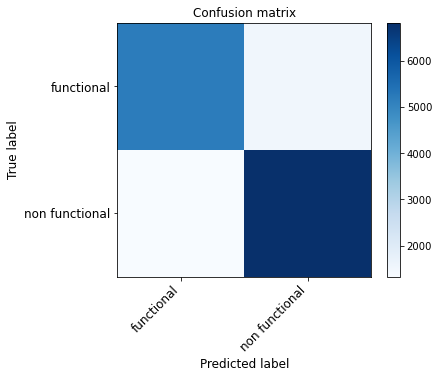

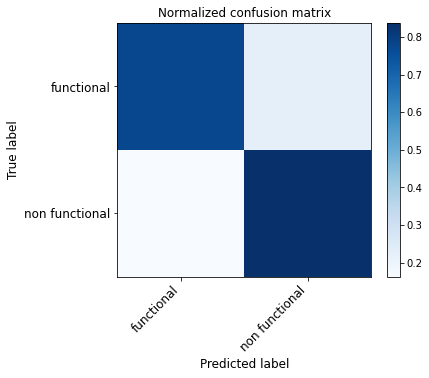

Test Score 0.8098316498316498


In [73]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

from sklearn.metrics import confusion_matrix
labels=['functional','non functional']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)


# Compute confusion matrix
cm = confusion_matrix(y_test, clf_rf.predict(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()
print ('Test Score', cm.diagonal().sum()/float(cm.sum()))


In [53]:
grid_p = {
    "classifier__max_depth": [1, 5, 10],
    "classifier__min_samples_split": [2, 10, 100]
}


In [54]:
grid = GridSearchCV(clf_rf, grid_p, scoring='f1')

In [55]:
output = grid.fit(X_train, y_train)

In [56]:
output.best_params_

{'classifier__max_depth': 10, 'classifier__min_samples_split': 2}

In [71]:
def evaluate(estimator, X_tr, X_te, y_tr, y_te, roc_auc='skip'):
    '''
    Evaluation function to show a few scores for both the train and test set
    Also shows a confusion matrix for the test set
    
    roc_auc allows you to set how to calculate the roc_auc score: 
    'dec' for decision_function or 'proba' for predict_proba 
    If roc_auc == 'skip', then it ignores calculating the roc_auc_score
    
    Inputs:
        estimator: a fit sklearn-style model or pipeline
        X_tr: array or pandas dataframe
            training input variables
        X_te: array or pandas dataframe
            testing input variables
        y_tr: array or pandas series
            training output variable
        y_te: array or pandas series
            testing output variable
        roc_auc: str
            'skip': default, skips calculating roc_auc
            'dec': use decision_function to calculate roc_auc
            'proba': use predict_proba to calculate roc_auc
            
    '''
    # Grab predictions
    tr_preds = estimator.predict(X_tr)
    te_preds = estimator.predict(X_te)
    
    # output needed for roc_auc_score
    if roc_auc == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif roc_auc == 'dec': 
        train_out = estimator.decision_function(X_train)
        test_out = estimator.decision_function(X_test)
    elif roc_auc == 'proba': 
        train_out = estimator.predict_proba(X_train)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_test)[:, 1]
    else:
        raise Exception("The value for roc_auc should be 'skip', 'dec' or 'proba'")    
    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train Precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train Recall: {recall_score(y_tr, tr_preds)}")
    print(f"Train F1-Score: {f1_score(y_tr, tr_preds)}")
    if type(train_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
        
    print("*" * 10)
    print("Testing Scores:")
    print(f"Test Accuracy: {accuracy_score(y_te, te_preds)}")
    print(f"Test Precision: {precision_score(y_te, te_preds)}")
    print(f"Test Recall: {recall_score(y_te, te_preds)}")
    print(f"Test F1-Score: {f1_score(y_te, te_preds)}")
    if type(test_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")    
    
   

In [72]:
evaluate(output.best_estimator_, X_train, X_test, y_train, y_test, roc_auc='proba')

Training Scores:
Train Accuracy: 0.7878114478114479
Train Precision: 0.7564492981903462
Train Recall: 0.896498796980005
Train F1-Score: 0.8205410536307546
ROC-AUC: 0.867079217096057
**********
Testing Scores:
Test Accuracy: 0.7784511784511785
Test Precision: 0.7558665684520678
Test Recall: 0.8810253894272048
Test F1-Score: 0.8136610783869507
ROC-AUC: 0.8524798362715192


## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any relevant modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?
- What does this final model tell you about the relationship between your inputs and outputs?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- How could the stakeholder use your model effectively?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
